In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Leer una imagen con openCV
img = cv2.imread('imagenes/test/cheems.jpg', 1)# 1 puede ser omitido

# mostrar la imagen leida
# cv2.imshow('Cheems', img)
# cv2.waitKey(0)

## Nota
al momento que leemos una imagen, podemos colocar como segundo parametro un 1 y esto indica que la imagen sera leida en RGB, en cambio si colocamos un 0 la imagen sera leida en escala de grises

In [3]:
img_gray = cv2.imread('imagenes/test/cheems.jpg', 0)
# cv2.imshow('Cheems en gris', img_gray)
# cv2.waitKey(0)

'''Guardando la imagen en escala de grises
indicamos la ruta donde se guardara la imagen y la variable que contiene la imagen'''
# cv2.imwrite('./imagenes/test/cheems_gray.jpg', img_gray)

'Guardando la imagen en escala de grises\nindicamos la ruta donde se guardara la imagen y la variable que contiene la imagen'

# RGB en OpenCV

Una imagen es un conjunto de pixeles distribuidos en forma de cuadricula. Cada pixel a su vez está conformado por otros componentes, que combinados forman los colores que podemos ver en una imagen.

RGB(RED, GREEN, BLUE), es uno de los espacios de color más utilizado en cuanto a imágenes se trata y el que usa por defecto OpenCV al momento de leer una imagen o dibujar figuras geometricas.

OpenCV usa estos componentes en BGR, no RGB.

RGB posee 3 componentes y cada uno toma valores de entre 0 y 255, para representar el color negro cada uno de los canales tiene el valor 0, siendo el blanco el opuesto el valor de sus canales es 255.


In [4]:
# Construyendo una imagen con numpy

# Constrimos una imagen de 300 x 300 y puede ocupar los tres colores RGB
bgr = np.zeros((300, 300, 3), dtype=np.uint8)

# Asignamos valores a los canales RGB
bgr[:,:,:] = (255, 0, 100) # una tonalidad de azul
# bgr[:,:,:] = (0, 0, 0) # Color negro
# bgr[:,:,:] = (255, 255, 255) # Color blanco
# bgr[:,:,:] = (255, 0, 0) # azul
bgr[:,:,:] = (0, 255, 0) # verde
# bgr[:,:,:] = (0, 0, 255) # rojo

# cv2.imshow('BGR', bgr)
# cv2.waitKey(0)

## Imagen de BGR a RGB

Para transformar de bgr a rgb usamos la funcion cv2.cvtColor, la cual le damos una imagen seguido de cv2.COLOR_BGR2RGB

In [5]:
bgr = cv2.imread('imagenes/test/cheems.jpg')
C1 = bgr[:,:,0] #B
C2 = bgr[:,:,1] #G
C3 = bgr[:,:,2] #R
# cv2.imshow('BGR', np.hstack([C1, C2, C3]))

rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
C1 = bgr[:,:,0] #R
C2 = bgr[:,:,1] #G
C3 = bgr[:,:,2] #B
# cv2.imshow('RGB', np.hstack([C1, C2, C3]))
# cv2.waitKey(0)

# Umbralización simple / simple Thresholding

La umbralizacion es el metodo mas simple de la segmentacion de imágenes cuyo objetivo es seprara un objeto de interés del fondo de una imagen. Debe emplearse en imagenes en las que el objeto y el fondo sean diferentes.

Para poder implementar esta técnica, OpenCV tiene una función ya creada llamada cv2.threshold donde se especifica:

* Imágen en escala de grises
* Umbral
* Nuevo valor
* MÉtodo de umbralización a emplear

los tipos de umbralizacion son: 

* cv2.THRESH_BINARY
* cv2.THRESH_BINARY_INV
* cv2.THRESH_TRUNC
* cv2.THRESH_TOZERO
* cv2.THRESH_TOZERO_INV


## THRESH_BINARY & THRESH_BINARY_INV

El  umbral en este caso se ha determinado en 210, todos los valores de los pixeles por encima de este umbral se les asigna 255 (blanco) y 0 (negro) para aquellos que no superan en umbral, como se ve para cv2.THRESH_BINARY. Mientras que inversamente paracv2.THRESH_BINARY_INV

In [6]:
rosa = cv2.imread('imagenes/rosas/abiertas/ej6.jpeg', 0)

In [7]:
# contamos con una imagen en escala de grises declarada anteriormente
# cambiamos el tamaño de la imagen
image = cv2.resize(rosa, (400, 450))

_, binarizada = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
_, binarizada_inv = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY_INV)

cv2.imshow('Original - binary - binary inv', np.hstack([image, binarizada, binarizada_inv]))
cv2.waitKey(0)

-1

# cv2.THRESH_TRUNC

En el tipo truncate, cuando los pixeles son mayores al valor del umbral, estos toman el valor del umbral, por lo tanto el tercer argumento que se le da a cv2.threshold es ignorado. Si el valor del pixel es menor al del umbral, entonces permanece la misma intensidad de la imagen de entrada

In [8]:
_, trunc = cv2.threshold(image, 100, 255, cv2.THRESH_TRUNC)
cv2.imshow('Original - Trunc', np.hstack([image, trunc]))
cv2.waitKey(0)

-1

# cv2.THRESH_TOZERO & cv2.THRESH_TOZERO_INV

En el caso de umbralización to zero, cuando el valor del pixel es mayor a la del umbral se mantiene el mismo gris de la imagen original, mientras que cuando el valor del pixel es menor al umbral se asigna 0 (negro). Y también se puede apreciar to zero de forma invertida con cv2.THRESH_TOZERO_INV.


Por último, comunmente el color blanco representará el área donde está presente el objeto de interés y en negro el fondo.

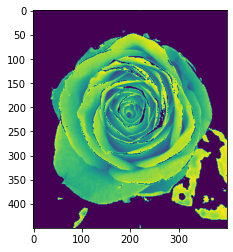

In [12]:
_, tozero = cv2.threshold(image, 100, 255, cv2.THRESH_TOZERO)
_, tozero_inv = cv2.threshold(image, 100, 255, cv2.THRESH_TOZERO_INV)

# cv2.imshow('Original - ToZero - ToZero_inv', np.hstack([image, tozero, tozero_inv]))
# cv2.waitKey(0)

plt.imshow(tozero_inv)
plt.show()